# High-Dimensional Logistic Regression

An example of bayesian linear regression in very high dimension.

In [1]:
import numpy as np
import scipy.special

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import pystan

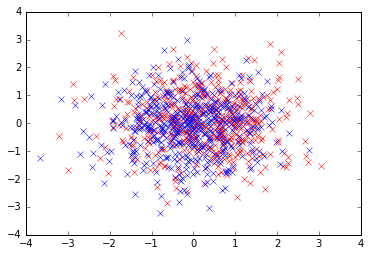

In [2]:
def generate_data(N, D):
    np.random.seed(1)
    x = np.random.randn(N, D)
    beta = np.zeros(D)
    beta[0:10] = 1
    beta[10:20] = -1
    alpha = 0
    p = scipy.special.expit(x.dot(beta) + alpha)
    r = np.random.uniform(size=N)
    category = r < p
    return x, category

N = 1000
D = 50
x, category = generate_data(N, D)
x[-1] = 1.
y = np.array(category, dtype=int)
x0 = x[category]
x1 = x[np.logical_not(category)]

plt.plot(x0[:,0], x0[:,1], 'rx');
plt.plot(x1[:,0], x1[:,1], 'bx');

In [3]:
import pystan
model_code = """
data {
    int<lower=0> N;
    int<lower=1> D;

    int<lower=0, upper=1> y[N];
    matrix[N,D] x;
}

parameters {
    vector[D] beta;
    real alpha;
}

model {
    to_vector(beta) ~ normal(0,5);
    alpha ~ normal(0, 5);

    y ~ bernoulli_logit(x * beta + alpha);
}
"""
model = pystan.StanModel(model_code=model_code)

In [4]:
fit = model.sampling(data=dict(N=N, D=D, x=x, y=y))

In [5]:
print fit

Inference for Stan model: anon_model_06dc2bf4c40e36e4b192f977233fc3b4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[0]    1.22  5.5e-3   0.15   0.95   1.12   1.21   1.31   1.51  708.0    1.0
beta[1]    1.06  5.1e-3   0.15   0.77   0.95   1.06   1.16   1.37  886.0    1.0
beta[2]    1.27  5.5e-3   0.16   0.97   1.17   1.27   1.38   1.58  798.0    1.0
beta[3]    1.27  5.3e-3   0.15    1.0   1.17   1.27   1.37   1.57  772.0    1.0
beta[4]     1.3  5.2e-3   0.15   1.01   1.19    1.3    1.4   1.61  847.0    1.0
beta[5]    1.17  5.1e-3   0.15   0.89   1.06   1.16   1.27   1.48  876.0    1.0
beta[6]    1.12  5.1e-3   0.15   0.83   1.02   1.12   1.22   1.42  848.0    1.0
beta[7]    1.16  5.1e-3   0.15   0.88   1.06   1.16   1.26   1.46  875.0    1.0
beta[8]    1.47  5.9e-3   0.16   1.16   1.36   1.47   1.58    1.8  759.0    1.0
beta[9]    

In [6]:
samples = fit.extract()
beta_samples = samples['beta']

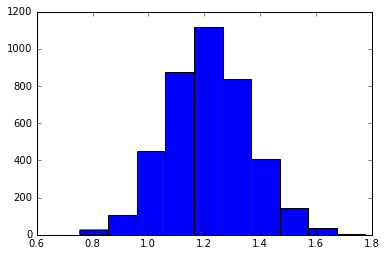

In [7]:
plt.hist(beta_samples[:,0]);

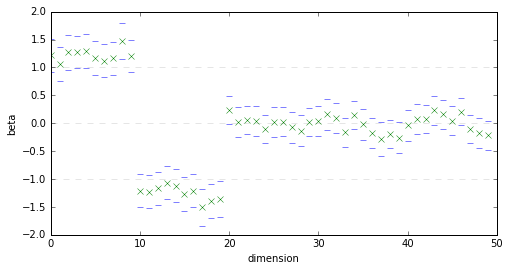

In [8]:
beta = beta_samples.mean(axis=0).squeeze()
sigma = beta_samples.std(axis=0).squeeze()
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set_xlabel('dimension')
ax.set_ylabel('beta')
ax.plot(beta, 'gx')
ax.plot(beta + 2*sigma, 'b_');
ax.plot(beta - 2*sigma, 'b_');
ax.plot([0,D],[1,1],'k--', alpha=0.1)
ax.plot([0,D],[0,0],'k--', alpha=0.1)
ax.plot([0,D],[-1,-1],'k--', alpha=0.1);

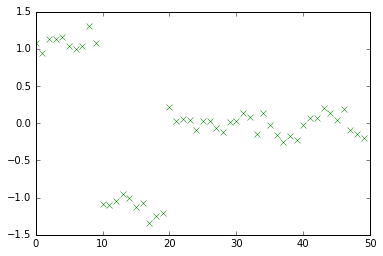

In [9]:
opt = model.optimizing(data=dict(N=N, D=D, x=x, y=y))
plt.plot(opt['beta'], 'gx')
plt.show()